**Universidad Autónoma Metropolitana - Unidad Iztapalapa (UAM-I)**

**Maestría en Matemáticas Aplicadas e Industriales (MCMAI)**

**Taller de Modelado Matemático II - Parte I**

> Trimestre 25-P

**Profesor**: 
    
> Dr. Alejandro Román Vásquez

**Alumnos**: 
    
> Alan Badillo Salas
> 
> Brandon Eduardo Antonio Gómez

# **Proyecto Final**


In [1]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

# Fase 1 - Adquisición de los datos

Cargamos el dataset "Adult" notando que faltan los encabezados (cabeceras) y hay explicar quiénes son las columnas (sacadas de `adult.names`)

In [2]:
adult = pandas.read_csv("adult.data", header=None)

adult.columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"]

adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Analizamos la información general observando 32,561 registros en 15 columnas no nulas.

In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Fase 2 - Ingeniería de variables

Primero extraemos los ejes de datos observando que hay 6 numéricos y 9 categóricos que analizaremos para extraer las posibles variables de análisis.

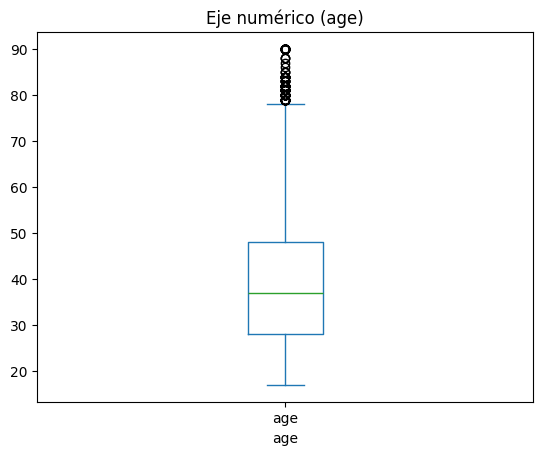

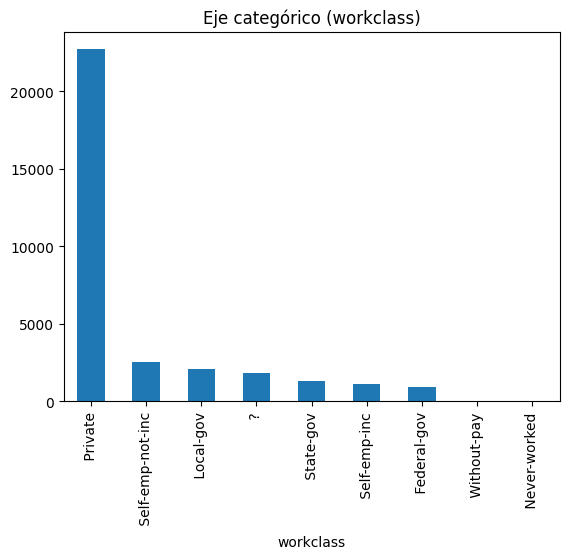

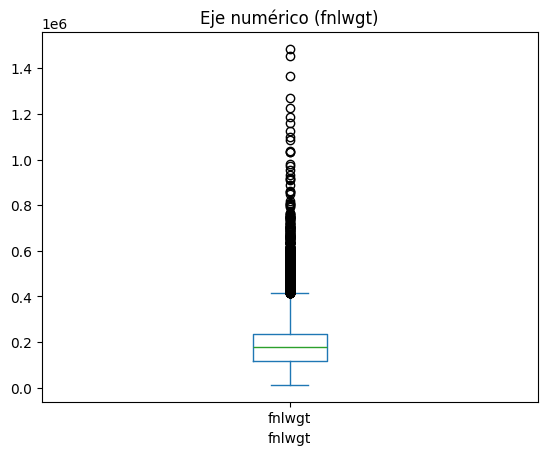

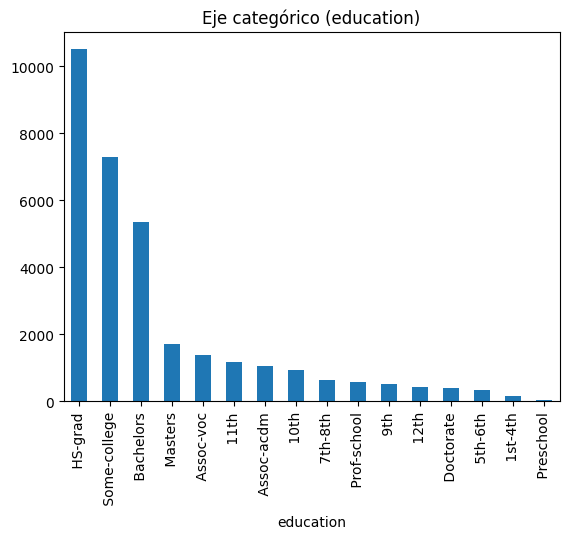

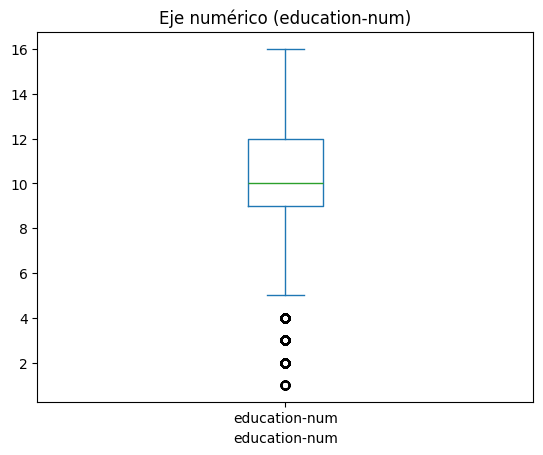

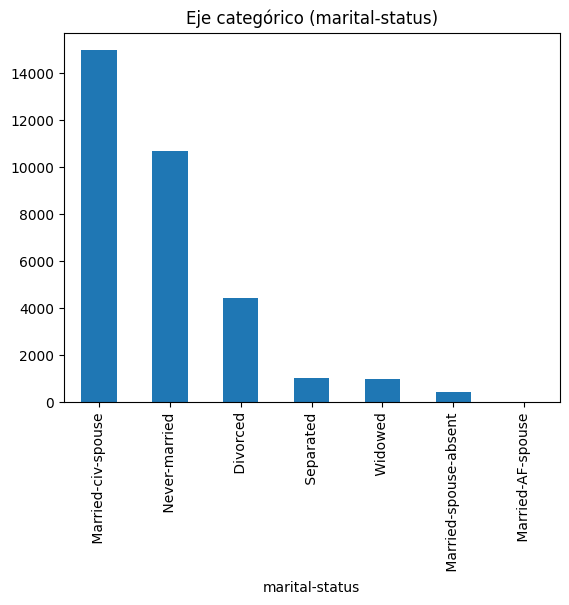

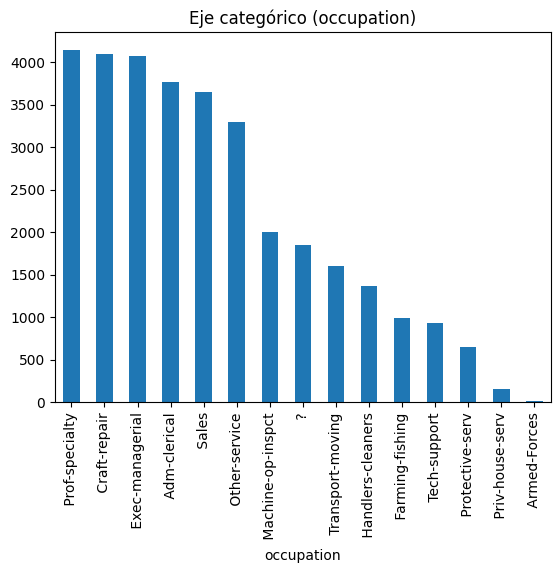

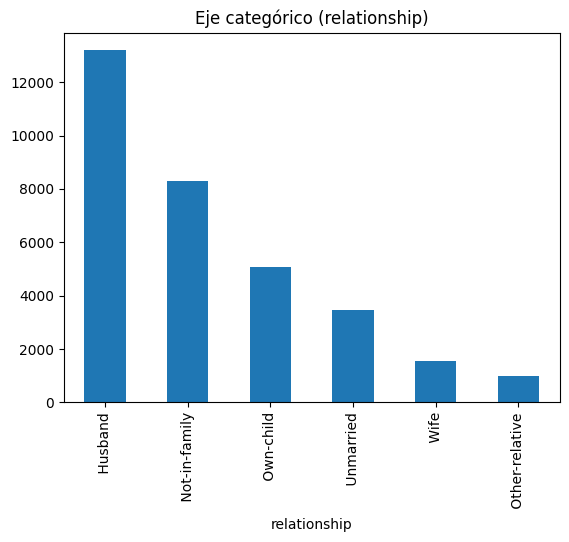

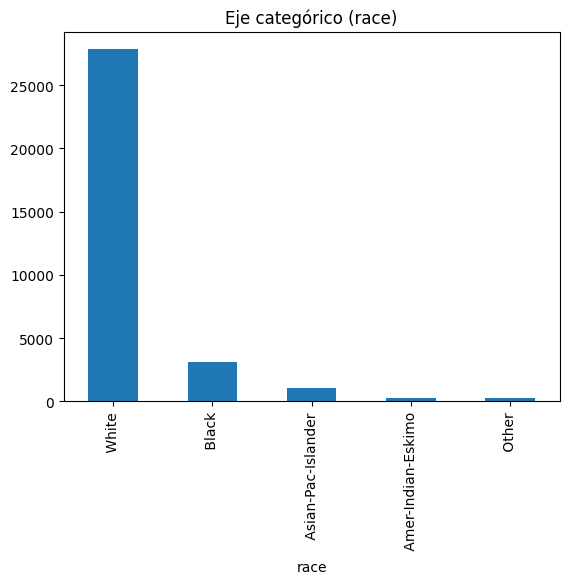

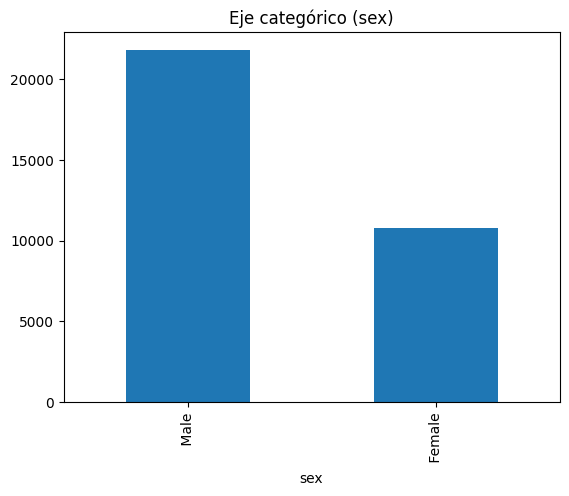

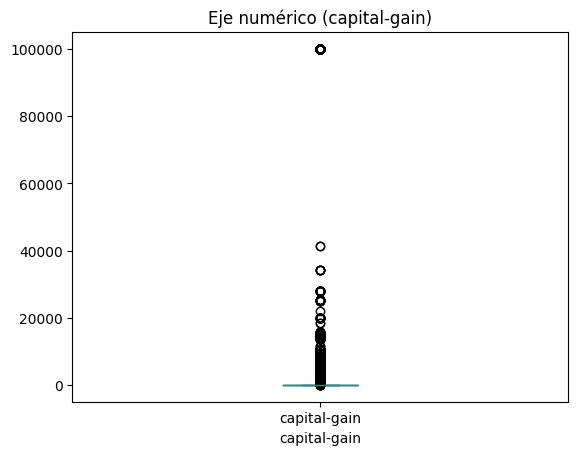

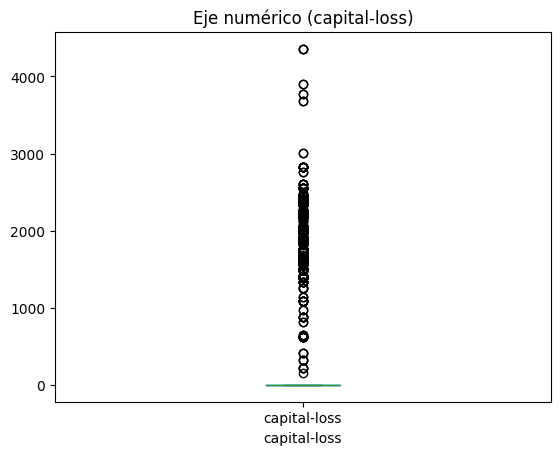

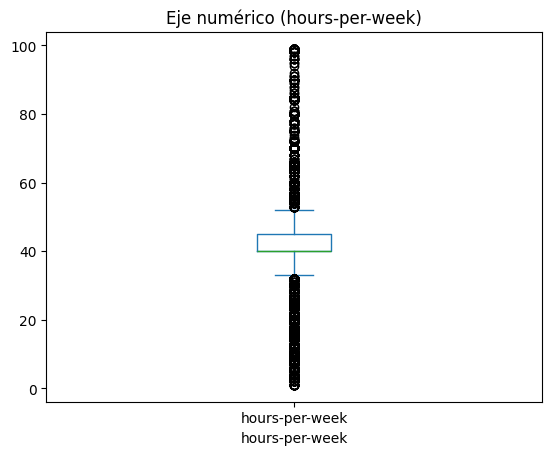

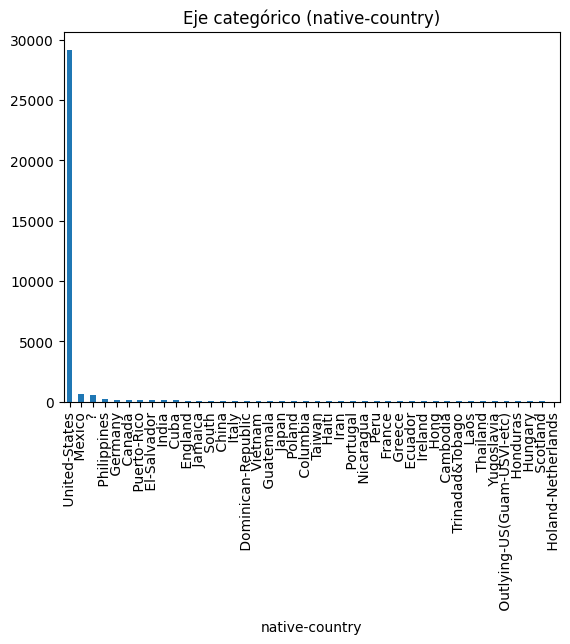

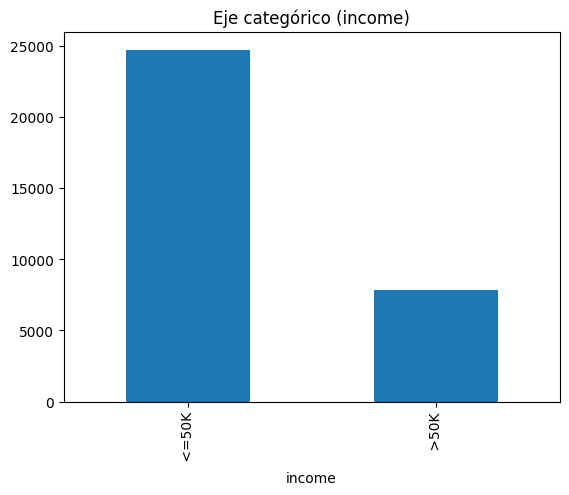

In [4]:
for column in adult.columns:
    if adult[column].dtype == object:
        adult[column].value_counts().plot.bar()
        pyplot.xlabel(column)
        pyplot.title(f"Eje categórico ({column})")
        pyplot.show()
    else:
        adult[column].plot.box()
        pyplot.xlabel(column)
        pyplot.title(f"Eje numérico ({column})")
        pyplot.show()

* **age**: En edad observamos puntos atípicos y podríamos estratificar la edad o tomarla como una variable continua o normalizada, por ejemplo, de la menor a la mayor edad o por segmentos de edades.
* **workclass**: En tipo de trabajo observamos que la mayoría son del sector privado y los demás se dividen en los puestos gubernamentales, auto-empleados y que no trabajan. Además hay una categoría donde están los desconocidos (`?`).
* **relationship**: En tipo de relación la mayoría es esposo y las demás pueden ser *dummies*.

In [5]:
adult["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
y = adult["income"].map({
    " <=50K": 0,
    " >50K": 1
})

y.sample(5)

13904    0
14428    0
11715    0
4016     0
13646    0
Name: income, dtype: int64

In [7]:
adult["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

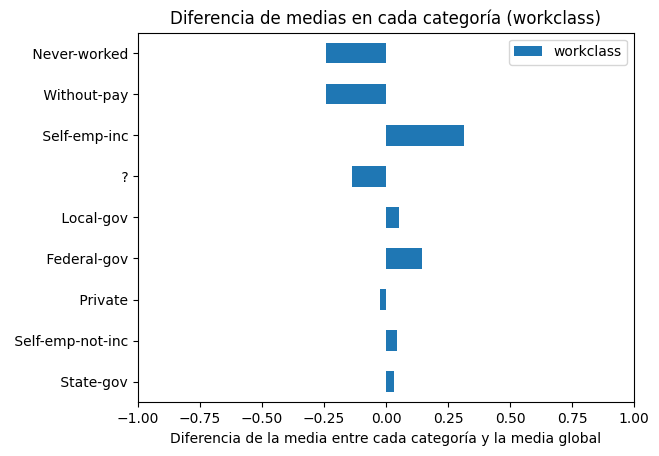

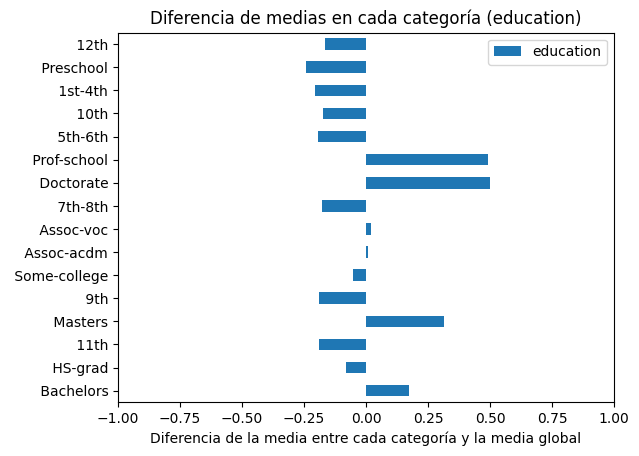

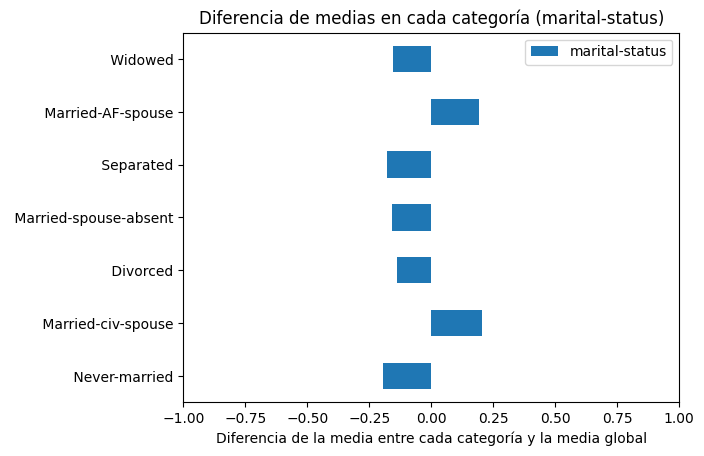

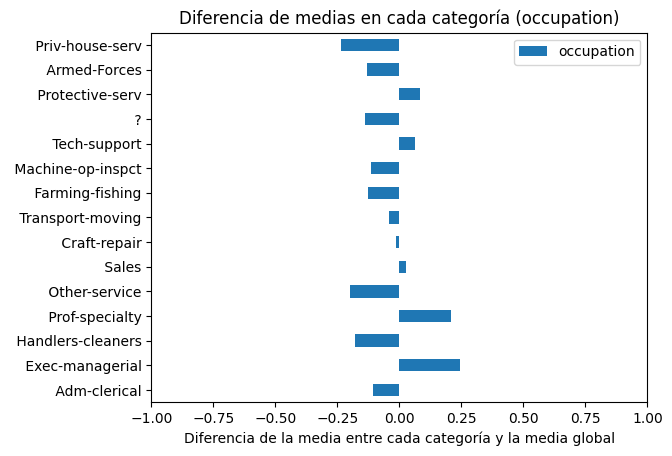

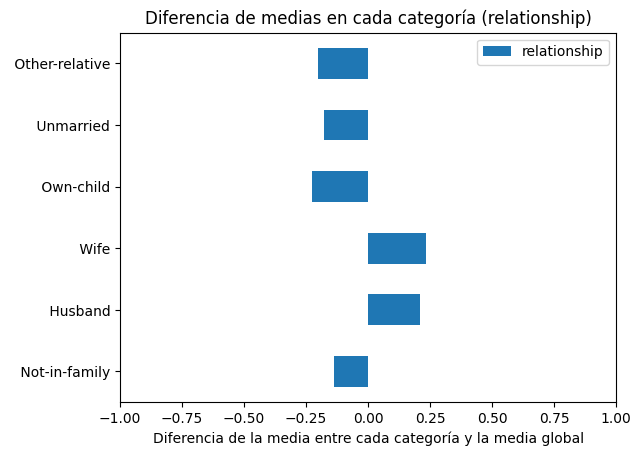

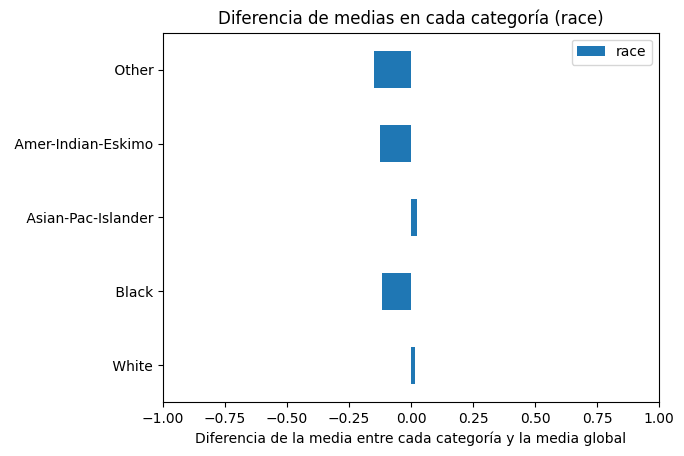

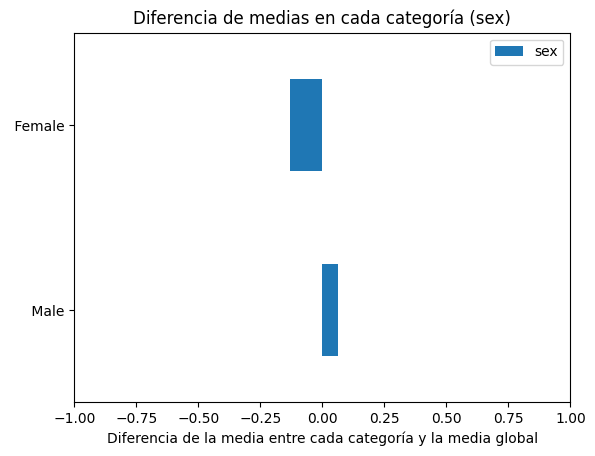

In [8]:
for column in adult.columns:
    if column == "native-country": # Ignoramos native-country para hacerla por separado
        continue
    
    if column == "income": # Ignoramos income porque es la respuesta
        continue

    if adult[column].dtype != object: # Excluye los que no son categóricos
        continue

    # print(column)
    mu = y.mean()

    categorias = adult[column].unique()

    xj = pandas.DataFrame(numpy.zeros(len(categorias)), index=categorias, columns=[column])

    for cat_j in categorias:
        mu_j = y[adult[column] == cat_j].mean() # Filtrar las y's donde la columna es igual a la categoría j-ésima

        xj.loc[cat_j] = mu_j - mu # En los mismos índices donde la catagoría es la j-ésima actualizamos los valores de x

    # print(xj)
    # print()
    xj.plot.barh()
    pyplot.title(f"Diferencia de medias en cada categoría ({column})")
    pyplot.xlabel("Diferencia de la media entre cada categoría y la media global")
    pyplot.xlim((-1, 1))
    pyplot.show()
    

In [9]:
mu = y.mean()

# Categorías de native-country
categorias = adult["native-country"].unique()

xj = pandas.DataFrame(numpy.zeros_like(categorias), index=categorias, columns=["native-country"])

for cat_j in categorias:
    mu_j = y[adult["native-country"] == cat_j].mean()

    xj.loc[cat_j] = mu_j - mu

xj.sort_values("native-country", ascending=False)

,native-country
Iran,0.177795
France,0.172984
India,0.15919
Taiwan,0.151347
Japan,0.146287
Yugoslavia,0.13419
Cambodia,0.127611
Italy,0.101656
England,0.092524
Canada,0.081504


<Axes: >

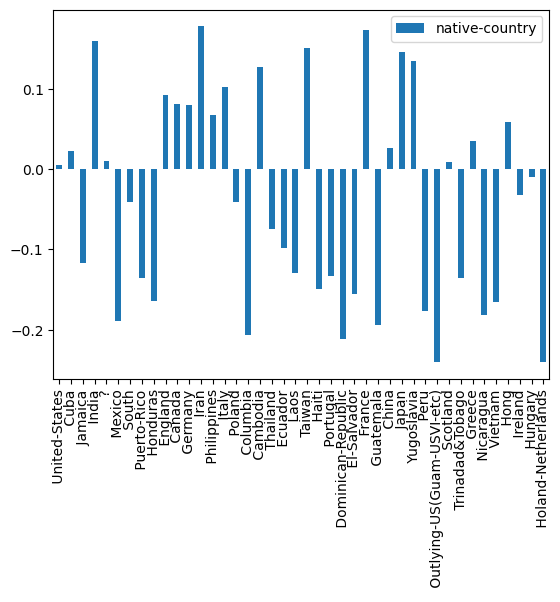

In [10]:
xj.plot.bar()

In [11]:
from sklearn.cluster import KMeans

clu = KMeans()

clu.fit(xj)

xj["clu"] = clu.labels_

xj.sort_values("native-country", ascending=False)

,native-country,clu
Iran,0.177795,4
France,0.172984,4
India,0.15919,4
Taiwan,0.151347,4
Japan,0.146287,4
Yugoslavia,0.13419,4
Cambodia,0.127611,4
Italy,0.101656,1
England,0.092524,1
Canada,0.081504,1


In [12]:
a = pandas.Series([1, 3, 4, 5, 3, 8, 10])

a

0     1
1     3
2     4
3     5
4     3
5     8
6    10
dtype: int64

In [13]:
(a == 3).astype(int)

0    0
1    1
2    0
3    0
4    1
5    0
6    0
dtype: int64

## Construcción de las varibles

In [14]:
def test_categorias(x, indices=[]):
    categorias = x.unique()
    s = numpy.zeros_like(x)
    for j in indices:
        cat_j = categorias[j]
        s = s + (x == cat_j).astype(int)
    return s

In [15]:
pandas.DataFrame(adult["workclass"].unique(), columns=["Categoría"])

,Categoría
0,State-gov
1,Self-emp-not-inc
2,Private
3,Federal-gov
4,Local-gov
5,?
6,Self-emp-inc
7,Without-pay
8,Never-worked


In [16]:
x1 = test_categorias(adult["workclass"], [8, 7])
x2 = test_categorias(adult["workclass"], [6])
x3 = test_categorias(adult["workclass"], [3])
x4 = test_categorias(adult["workclass"], [4, 0, 1])
x5 = test_categorias(adult["workclass"], [5])

In [17]:
pandas.DataFrame(adult["education"].unique(), columns=["Categoría"])

,Categoría
0,Bachelors
1,HS-grad
2,11th
3,Masters
4,9th
5,Some-college
6,Assoc-acdm
7,Assoc-voc
8,7th-8th
9,Doctorate


In [18]:
x6 = test_categorias(adult["education"], [9, 10])
x7 = test_categorias(adult["education"], [3, 0])
x8 = test_categorias(adult["education"], [14, 13, 11])
x9 = test_categorias(adult["education"], [8, 4, 12, 2, 15])

In [19]:
pandas.DataFrame(adult["marital-status"].unique(), columns=["Categoría"])

,Categoría
0,Never-married
1,Married-civ-spouse
2,Divorced
3,Married-spouse-absent
4,Separated
5,Married-AF-spouse
6,Widowed


In [20]:
x10 = test_categorias(adult["marital-status"], [5, 1])

In [21]:
pandas.DataFrame(adult["occupation"].unique(), columns=["Categoría"])

,Categoría
0,Adm-clerical
1,Exec-managerial
2,Handlers-cleaners
3,Prof-specialty
4,Other-service
5,Sales
6,Craft-repair
7,Transport-moving
8,Farming-fishing
9,Machine-op-inspct


In [22]:
x11 = test_categorias(adult["occupation"], [14, 4, 2])
x12 = test_categorias(adult["occupation"], [3, 1])
x13 = test_categorias(adult["occupation"], [12, 10, 5])

In [23]:
pandas.DataFrame(adult["relationship"].unique(), columns=["Categoría"])

,Categoría
0,Not-in-family
1,Husband
2,Wife
3,Own-child
4,Unmarried
5,Other-relative


In [24]:
x14 = test_categorias(adult["relationship"], [2, 1])

In [25]:
pandas.DataFrame(adult["race"].unique(), columns=["Categoría"])

,Categoría
0,White
1,Black
2,Asian-Pac-Islander
3,Amer-Indian-Eskimo
4,Other


In [26]:
x15 = test_categorias(adult["race"], [4, 3, 1])

In [27]:
pandas.DataFrame(adult["sex"].unique(), columns=["Categoría"])

,Categoría
0,Male
1,Female


In [28]:
x16 = test_categorias(adult["sex"], [1])

In [29]:
pandas.DataFrame(adult["native-country"].unique(), columns=["Categoría"])

,Categoría
0,United-States
1,Cuba
2,Jamaica
3,India
4,?
5,Mexico
6,South
7,Puerto-Rico
8,Honduras
9,England


In [30]:
x17 = test_categorias(adult["native-country"], [12, 26, 3, 21, 29, 30, 17])
x18 = test_categorias(adult["native-country"], [14, 9, 10, 11, 13, 38])
x19 = test_categorias(adult["native-country"], [18, 19, 2, 20, 23, 34, 7, 22])
x20 = test_categorias(adult["native-country"], [25, 8, 37, 31, 36, 5, 27])
x21 = test_categorias(adult["native-country"], [16, 24, 32, 41])

In [31]:
def winzorizado(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    
    xmin = Q1 - 1.5 * IQR # -8
    xmax = Q3 + 1.5 * IQR # 8

    xp = (x < xmin) * xmin + ((x >= xmin) & (x <= xmax)) * x + (x > xmax) * xmax

    return xp

In [32]:
x22 = winzorizado(adult["age"])
x23 = winzorizado(adult["fnlwgt"])
# x25 = winzorizado(adult["capital-gain"])
# x26 = winzorizado(adult["capital-loss"])
x24 = winzorizado(adult["education-num"])
x27 = winzorizado(adult["hours-per-week"])

In [33]:
x25 = (adult["capital-gain"] > 0).astype(int)
x26 = (adult["capital-loss"] > 0).astype(int)

In [34]:
X = pandas.DataFrame([
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10,
    x11, x12, x13, x14, x15, x16, x17, x18, x19, x20,
    x21, x22, x23, x24, x25, x26, x27
], index=[
    "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10",
    "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20",
    "x21", "x22", "x23", "x24", "x25", "x26", "x27"
]).T

X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,39.0,77516.0,13.0,1.0,0.0,40.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,50.0,83311.0,13.0,0.0,0.0,32.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38.0,215646.0,9.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,53.0,234721.0,7.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,28.0,338409.0,13.0,0.0,0.0,40.0


# Fase 3 - Modelos de Clasificación

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
# ! pip install xgboost
from xgboost import XGBClassifier

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    train_size=0.8, random_state=123, stratify=y)

In [38]:
y_train.value_counts(normalize=True)

income
0    0.759175
1    0.240825
Name: proportion, dtype: float64

In [39]:
y_test.value_counts(normalize=True)

income
0    0.759251
1    0.240749
Name: proportion, dtype: float64

## Reporte

✅ Exactitud
Proporción de predicciones correctas sobre el total de casos.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

✅ Precisión (Precision)
Qué proporción de las predicciones positivas fueron correctas.
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

✅ Sensibilidad (Recall o TPR)
Qué proporción de los positivos reales fueron correctamente identificados.
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

✅ Especificidad (TNR)
Qué proporción de los negativos reales fueron correctamente identificados.
$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

✅ F1-score
Media armónica entre precisión y recall.
$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

[[TN, FP],
 [FN, TP]]

* TN: True Negatives (verdaderos negativos)
* FP: False Positives (falsos positivos)
* FN: False Negatives (falsos negativos)
* TP: True Positives (verdaderos positivos)

In [40]:
def reporte(clf, X_test, y_test):
    y_pred = clf.predict(X_test)

    C = confusion_matrix(y_test, y_pred)

    TN, FP, FN, TP = C.ravel()

    seaborn.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm")
    pyplot.show()

    # Exactitud
    exactitud = (TN + TP) / (TN + FP + FN + TP)

    # Precisión
    precision = TP / (TP + FP)

    # Sensibilidad
    sensibilidad = TP / (TP + FN)

    # Especificidad
    especificidad = TN / (TN + FP)

    # F1-Score
    f1 = 2 * (precision * sensibilidad) / (precision + sensibilidad)

    return pandas.DataFrame([
        exactitud, precision, sensibilidad, especificidad, f1
    ], index=["Exactitud", "Presición", "Sensibilidad", "Especificidad", "F1"], columns=["Valor"])

## Regresión Logística

In [79]:
clf = LogisticRegression(
    penalty=None, 
    solver="saga",
    random_state=123)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7592507293106096

Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística (Simple)')

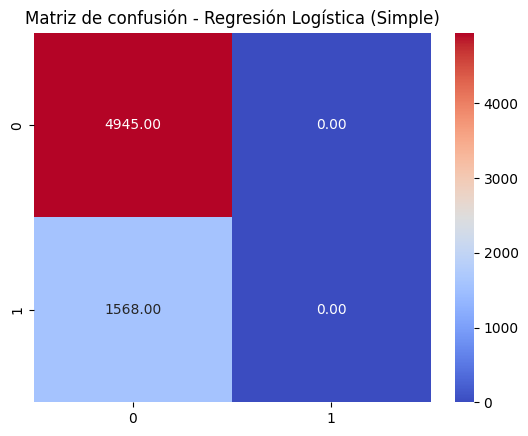

In [80]:
y_pred = clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = C.ravel()

seaborn.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm")
pyplot.title("Matriz de confusión - Regresión Logística (Simple)")

In [43]:
# Exactitud
exactitud = (TN + TP) / (TN + FP + FN + TP)

# Precisión
precision = TP / (TP + FP)

# Sensibilidad
sensibilidad = TP / (TP + FN)

# Especificidad
especificidad = TN / (TN + FP)

# F1-Score
f1 = 2 * (precision * sensibilidad) / (precision + sensibilidad)

pandas.DataFrame([
    exactitud, precision, sensibilidad, especificidad, f1
], index=["Exactitud", "Presición", "Sensibilidad", "Especificidad", "F1"], columns=["Valor"])

/var/folders/zr/py0pd6bs6gnfzg9ljbgr9v0c0000gn/T/ipykernel_58538/610393776.py:5: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


,Valor
Exactitud,0.759251
Presición,NaN
Sensibilidad,0.000000
Especificidad,1.000000
F1,NaN


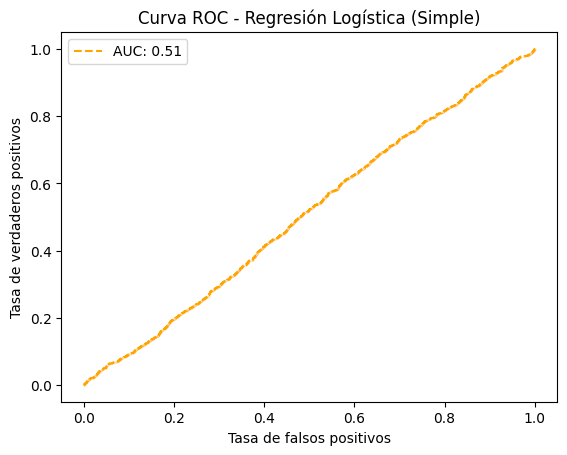

In [81]:
y_proba = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

roc_auc = auc(fpr, tpr)

pyplot.plot(fpr, tpr, 
            label=f"AUC: {roc_auc:.2f}",
            marker=".", markersize=0.1,
            linestyle="dashed",
            color="orange")
pyplot.legend()
pyplot.title("Curva ROC - Regresión Logística (Simple)")
pyplot.xlabel("Tasa de falsos positivos")
pyplot.ylabel("Tasa de verdaderos positivos")
pyplot.show()

## Regresión Logística Lasso

In [88]:
clf = LogisticRegression(
    penalty="l1", 
    solver="saga",
    random_state=123)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7592507293106096

Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística (Lasso)')

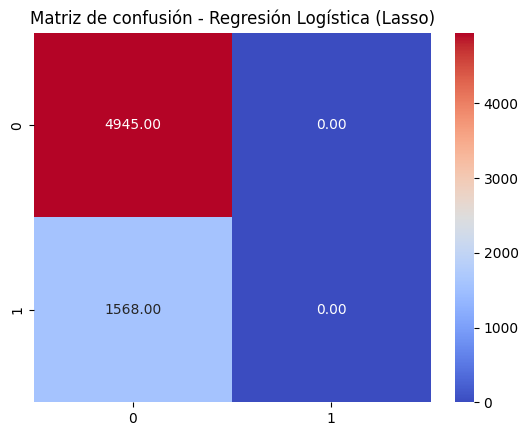

In [89]:
y_pred = clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = C.ravel()

seaborn.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm")
pyplot.title("Matriz de confusión - Regresión Logística (Lasso)")

In [90]:
# Exactitud
exactitud = (TN + TP) / (TN + FP + FN + TP)

# Precisión
precision = TP / (TP + FP)

# Sensibilidad
sensibilidad = TP / (TP + FN)

# Especificidad
especificidad = TN / (TN + FP)

# F1-Score
f1 = 2 * (precision * sensibilidad) / (precision + sensibilidad)

pandas.DataFrame([
    exactitud, precision, sensibilidad, especificidad, f1
], index=["Exactitud", "Presición", "Sensibilidad", "Especificidad", "F1"], columns=["Valor"])

/var/folders/zr/py0pd6bs6gnfzg9ljbgr9v0c0000gn/T/ipykernel_58538/610393776.py:5: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


,Valor
Exactitud,0.759251
Presición,NaN
Sensibilidad,0.000000
Especificidad,1.000000
F1,NaN


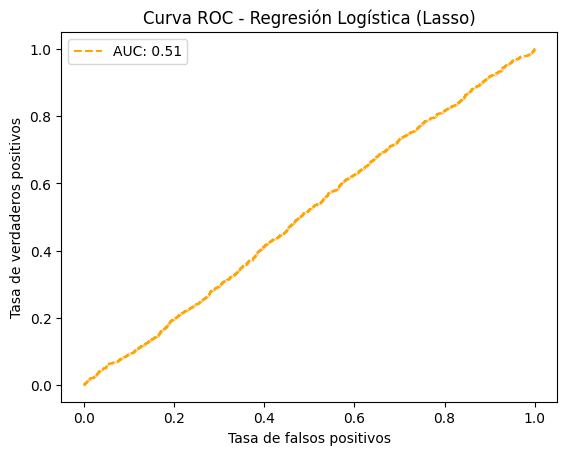

In [91]:
y_proba = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

roc_auc = auc(fpr, tpr)

pyplot.plot(fpr, tpr, 
            label=f"AUC: {roc_auc:.2f}",
            marker=".", markersize=0.1,
            linestyle="dashed",
            color="orange")
pyplot.legend()
pyplot.title("Curva ROC - Regresión Logística (Lasso)")
pyplot.xlabel("Tasa de falsos positivos")
pyplot.ylabel("Tasa de verdaderos positivos")
pyplot.show()

## Regresión Logística Ridge

In [92]:
clf = LogisticRegression(
    penalty="l2", 
    solver="saga",
    random_state=123)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7592507293106096

Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística (Ridge)')

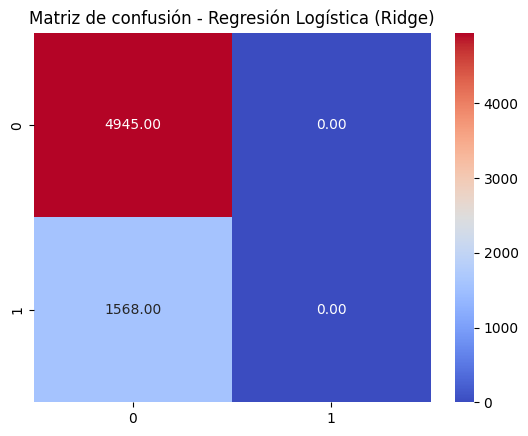

In [94]:
y_pred = clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = C.ravel()

seaborn.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm")
pyplot.title("Matriz de confusión - Regresión Logística (Ridge)")

In [95]:
# Exactitud
exactitud = (TN + TP) / (TN + FP + FN + TP)

# Precisión
precision = TP / (TP + FP)

# Sensibilidad
sensibilidad = TP / (TP + FN)

# Especificidad
especificidad = TN / (TN + FP)

# F1-Score
f1 = 2 * (precision * sensibilidad) / (precision + sensibilidad)

pandas.DataFrame([
    exactitud, precision, sensibilidad, especificidad, f1
], index=["Exactitud", "Presición", "Sensibilidad", "Especificidad", "F1"], columns=["Valor"])

/var/folders/zr/py0pd6bs6gnfzg9ljbgr9v0c0000gn/T/ipykernel_58538/610393776.py:5: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


,Valor
Exactitud,0.759251
Presición,NaN
Sensibilidad,0.000000
Especificidad,1.000000
F1,NaN


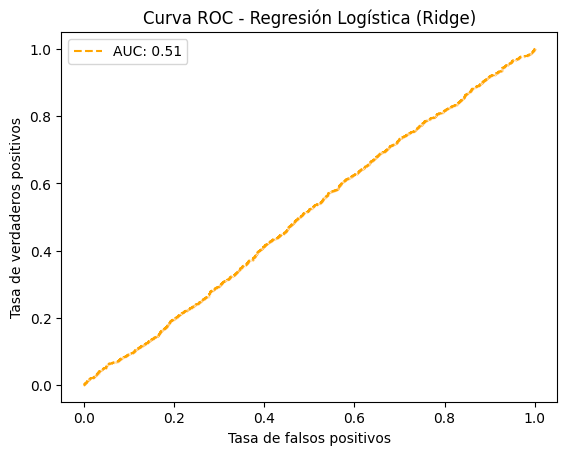

In [96]:
y_proba = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

roc_auc = auc(fpr, tpr)

pyplot.plot(fpr, tpr, 
            label=f"AUC: {roc_auc:.2f}",
            marker=".", markersize=0.1,
            linestyle="dashed",
            color="orange")
pyplot.legend()
pyplot.title("Curva ROC - Regresión Logística (Ridge)")
pyplot.xlabel("Tasa de falsos positivos")
pyplot.ylabel("Tasa de verdaderos positivos")
pyplot.show()

## Naive Bayes

In [97]:
clf = BernoulliNB()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7865806847842776

Text(0.5, 1.0, 'Matriz de confusión - Naive Bayes')

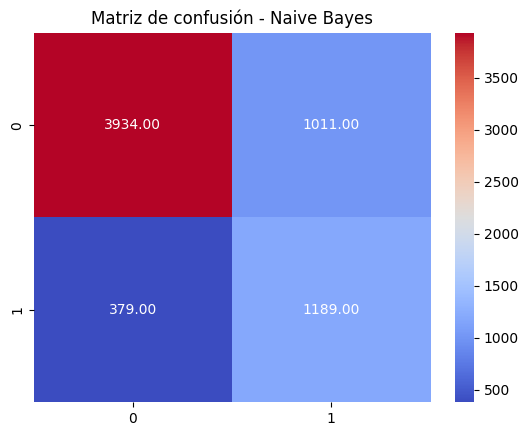

In [99]:
y_pred = clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = C.ravel()

seaborn.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm")
pyplot.title("Matriz de confusión - Naive Bayes")

In [55]:
# Exactitud
exactitud = (TN + TP) / (TN + FP + FN + TP)

# Precisión
precision = TP / (TP + FP)

# Sensibilidad
sensibilidad = TP / (TP + FN)

# Especificidad
especificidad = TN / (TN + FP)

# F1-Score
f1 = 2 * (precision * sensibilidad) / (precision + sensibilidad)

pandas.DataFrame([
    exactitud, precision, sensibilidad, especificidad, f1
], index=["Exactitud", "Presición", "Sensibilidad", "Especificidad", "F1"], columns=["Valor"])

,Valor
Exactitud,0.786581
Presición,0.540455
Sensibilidad,0.758291
Especificidad,0.795551
F1,0.631104


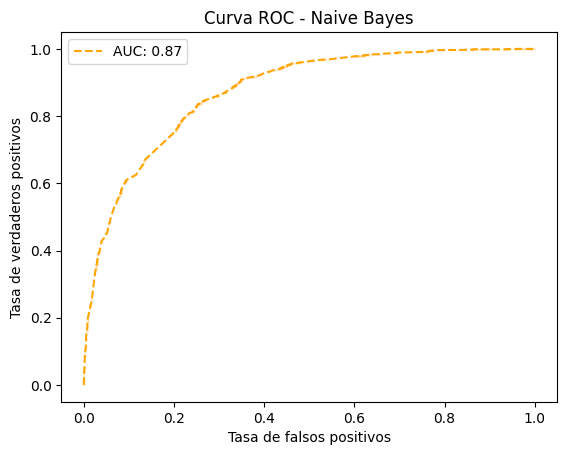

In [100]:
y_proba = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

roc_auc = auc(fpr, tpr)

pyplot.plot(fpr, tpr, 
            label=f"AUC: {roc_auc:.2f}",
            marker=".", markersize=0.1,
            linestyle="dashed",
            color="orange")
pyplot.legend()
pyplot.title("Curva ROC - Naive Bayes")
pyplot.xlabel("Tasa de falsos positivos")
pyplot.ylabel("Tasa de verdaderos positivos")
pyplot.show()

## Árboles de Decisión

In [101]:
clf = DecisionTreeClassifier(
    random_state=123)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7887302318440043

Text(0.5, 1.0, 'Matriz de confusión - Árbol de Decisión')

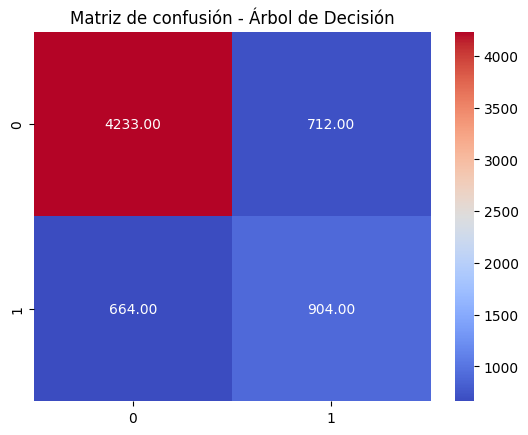

In [104]:
y_pred = clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = C.ravel()

seaborn.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm")
pyplot.title("Matriz de confusión - Árbol de Decisión")

In [59]:
# Exactitud
exactitud = (TN + TP) / (TN + FP + FN + TP)

# Precisión
precision = TP / (TP + FP)

# Sensibilidad
sensibilidad = TP / (TP + FN)

# Especificidad
especificidad = TN / (TN + FP)

# F1-Score
f1 = 2 * (precision * sensibilidad) / (precision + sensibilidad)

pandas.DataFrame([
    exactitud, precision, sensibilidad, especificidad, f1
], index=["Exactitud", "Presición", "Sensibilidad", "Especificidad", "F1"], columns=["Valor"])

,Valor
Exactitud,0.788730
Presición,0.559406
Sensibilidad,0.576531
Especificidad,0.856016
F1,0.567839


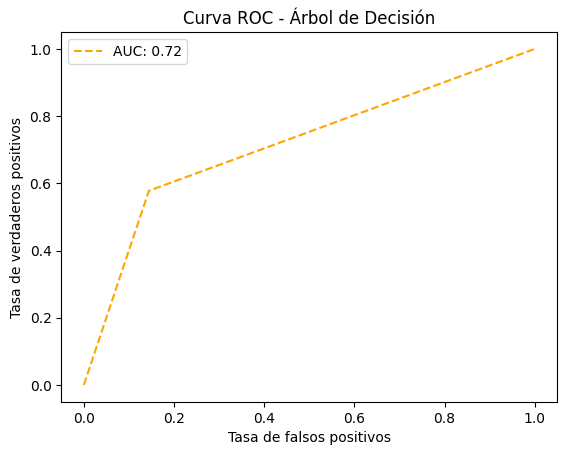

In [105]:
y_proba = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

roc_auc = auc(fpr, tpr)

pyplot.plot(fpr, tpr, 
            label=f"AUC: {roc_auc:.2f}",
            marker=".", markersize=0.1,
            linestyle="dashed",
            color="orange")
pyplot.legend()
pyplot.title("Curva ROC - Árbol de Decisión")
pyplot.xlabel("Tasa de falsos positivos")
pyplot.ylabel("Tasa de verdaderos positivos")
pyplot.show()

## Bósques Aleatorios

In [106]:
clf = RandomForestClassifier(
    random_state=123)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8326424074927069

Text(0.5, 1.0, 'Matriz de confusión - Bosque Aleatorio')

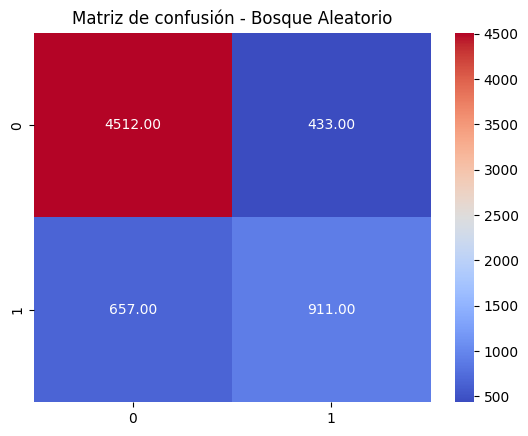

In [109]:
y_pred = clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = C.ravel()

seaborn.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm")
pyplot.title("Matriz de confusión - Bosque Aleatorio")

In [63]:
# Exactitud
exactitud = (TN + TP) / (TN + FP + FN + TP)

# Precisión
precision = TP / (TP + FP)

# Sensibilidad
sensibilidad = TP / (TP + FN)

# Especificidad
especificidad = TN / (TN + FP)

# F1-Score
f1 = 2 * (precision * sensibilidad) / (precision + sensibilidad)

pandas.DataFrame([
    exactitud, precision, sensibilidad, especificidad, f1
], index=["Exactitud", "Presición", "Sensibilidad", "Especificidad", "F1"], columns=["Valor"])

,Valor
Exactitud,0.832642
Presición,0.677827
Sensibilidad,0.580995
Especificidad,0.912437
F1,0.625687


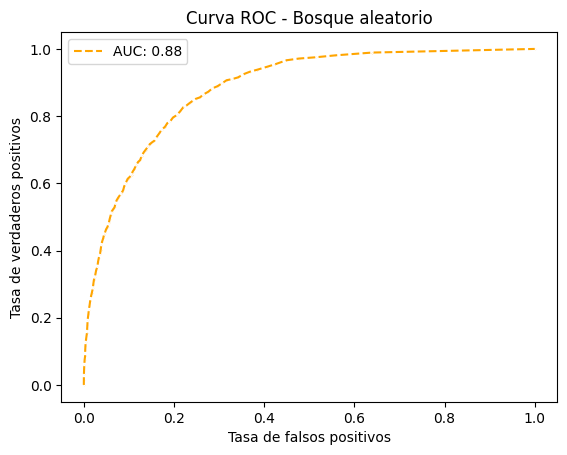

In [110]:
y_proba = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

roc_auc = auc(fpr, tpr)

pyplot.plot(fpr, tpr, 
            label=f"AUC: {roc_auc:.2f}",
            marker=".", markersize=0.1,
            linestyle="dashed",
            color="orange")
pyplot.legend()
pyplot.title("Curva ROC - Bosque aleatorio")
pyplot.xlabel("Tasa de falsos positivos")
pyplot.ylabel("Tasa de verdaderos positivos")
pyplot.show()

## XGBoost

In [111]:
clf = XGBClassifier(
    eval_metric="logloss",
    random_state=123
)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8453861507753724

Text(0.5, 1.0, 'Matriz de confusión - XGBoost')

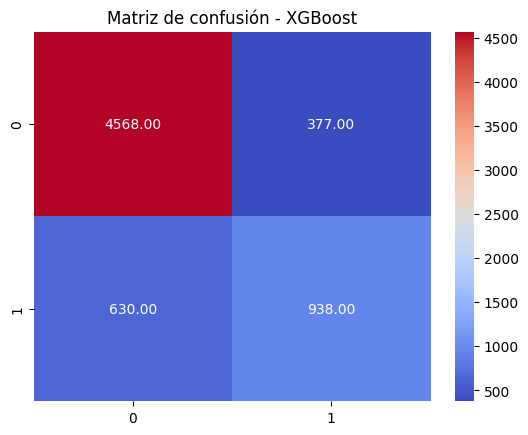

In [113]:
y_pred = clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = C.ravel()

seaborn.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm")
pyplot.title("Matriz de confusión - XGBoost")

In [67]:
# Exactitud
exactitud = (TN + TP) / (TN + FP + FN + TP)

# Precisión
precision = TP / (TP + FP)

# Sensibilidad
sensibilidad = TP / (TP + FN)

# Especificidad
especificidad = TN / (TN + FP)

# F1-Score
f1 = 2 * (precision * sensibilidad) / (precision + sensibilidad)

pandas.DataFrame([
    exactitud, precision, sensibilidad, especificidad, f1
], index=["Exactitud", "Presición", "Sensibilidad", "Especificidad", "F1"], columns=["Valor"])

,Valor
Exactitud,0.845386
Presición,0.713308
Sensibilidad,0.598214
Especificidad,0.923761
F1,0.650711


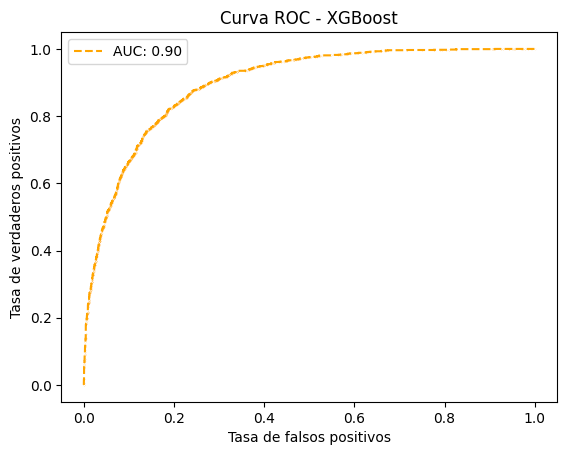

In [114]:
y_proba = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

roc_auc = auc(fpr, tpr)

pyplot.plot(fpr, tpr, 
            label=f"AUC: {roc_auc:.2f}",
            marker=".", markersize=0.1,
            linestyle="dashed",
            color="orange")
pyplot.legend()
pyplot.title("Curva ROC - XGBoost")
pyplot.xlabel("Tasa de falsos positivos")
pyplot.ylabel("Tasa de verdaderos positivos")
pyplot.show()

## SVC

In [115]:
clf = XGBClassifier(
    random_state=123
)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8453861507753724

Text(0.5, 1.0, 'Matriz de confusión - Soporte Vectorial')

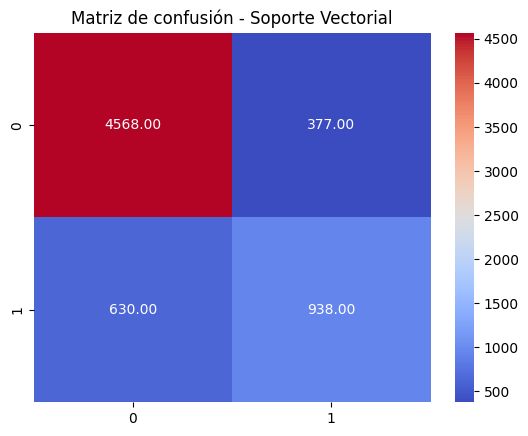

In [117]:
y_pred = clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = C.ravel()

seaborn.heatmap(C, annot=True, fmt=".2f", cmap="coolwarm")
pyplot.title("Matriz de confusión - Soporte Vectorial")

In [71]:
# Exactitud
exactitud = (TN + TP) / (TN + FP + FN + TP)

# Precisión
precision = TP / (TP + FP)

# Sensibilidad
sensibilidad = TP / (TP + FN)

# Especificidad
especificidad = TN / (TN + FP)

# F1-Score
f1 = 2 * (precision * sensibilidad) / (precision + sensibilidad)

pandas.DataFrame([
    exactitud, precision, sensibilidad, especificidad, f1
], index=["Exactitud", "Presición", "Sensibilidad", "Especificidad", "F1"], columns=["Valor"])

,Valor
Exactitud,0.845386
Presición,0.713308
Sensibilidad,0.598214
Especificidad,0.923761
F1,0.650711


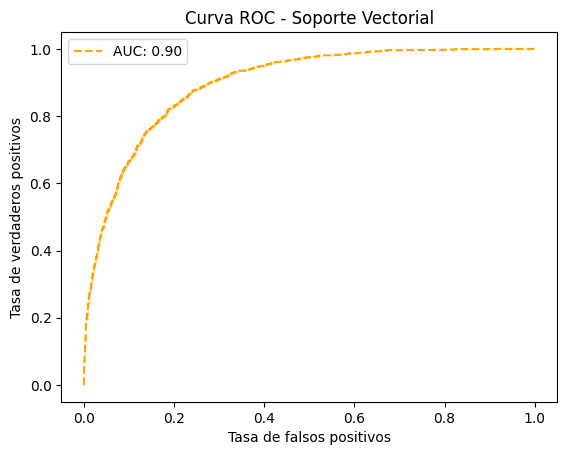

In [118]:
y_proba = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

roc_auc = auc(fpr, tpr)

pyplot.plot(fpr, tpr, 
            label=f"AUC: {roc_auc:.2f}",
            marker=".", markersize=0.1,
            linestyle="dashed",
            color="orange")
pyplot.legend()
pyplot.title("Curva ROC - Soporte Vectorial")
pyplot.xlabel("Tasa de falsos positivos")
pyplot.ylabel("Tasa de verdaderos positivos")
pyplot.show()

# Fase 4 - Ajuste del Modelo por Validación Cruzada

Podemos observar la diferencia de la exactitud y el área bajo la curva ROC de los diferentes modelos:

Modelo            | Exactitud | AUC
----------------- | --------- | ----
Logístico Simple  | 0.76      | 0.51
Logístico Lasso   | 0.76      | 0.51
Logístico Ridge   | 0.76      | 0.51
Naive Bayes       | 0.83      | 0.87
Árbol de Decisión | 0.79      | 0.72
Bosque Aleatorio  | 0.83      | 0.88
XGBoot            | 0.85      | 0.90
Support Vector    | 0.85      | 0.90

Usaremos XGBoost como el mejor y aplicaremos las técnicas de validación cruzada para encontrar los hiperparámetros.

Los hiperparámetros son:

* n_estimators: Number of boosting rounds
* max_depth: Maximum tree depth for base learners
* max_leaves: Maximum number of leaves; 0 indicates no limit
* max_bin: If using histogram-based algorithm, maximum number of bins per feature
* learning_rate: Boosting learning rate (xgb's "eta")

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
cv = RandomizedSearchCV(
    XGBClassifier(),
    param_distributions={
        "max_depth": [None, 10, 100],
        "max_leaves": [4, 6, 8]
    }
)

cv.fit(X_train, y_train)

cv

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'max_depth': [None, 10, 100],
                                        'max_leaves': [4, 6, 8]})

In [75]:
pandas.DataFrame(cv.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaves,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.098335,0.021212,0.002607,0.000345,4,None,"{'max_leaves': 4, 'max_depth': None}",0.855470,0.846833,0.847985,0.842772,0.844116,0.847435,0.004427,1
3,0.081611,0.001786,0.002461,0.000117,4,10,"{'max_leaves': 4, 'max_depth': 10}",0.855470,0.846833,0.847985,0.842772,0.844116,0.847435,0.004427,1
6,0.085570,0.002425,0.002498,0.000235,4,100,"{'max_leaves': 4, 'max_depth': 100}",0.855470,0.846833,0.847985,0.842772,0.844116,0.847435,0.004427,1
2,0.119268,0.018444,0.002688,0.000155,8,None,"{'max_leaves': 8, 'max_depth': None}",0.854702,0.848369,0.842226,0.844692,0.846804,0.847359,0.004212,4
5,0.118118,0.014680,0.003323,0.000645,8,10,"{'max_leaves': 8, 'max_depth': 10}",0.854702,0.848369,0.842226,0.844692,0.846804,0.847359,0.004212,4
8,0.125483,0.003768,0.003312,0.000432,8,100,"{'max_leaves': 8, 'max_depth': 100}",0.854702,0.848369,0.842226,0.844692,0.846804,0.847359,0.004212,4
1,0.110361,0.003823,0.002892,0.000278,6,None,"{'max_leaves': 6, 'max_depth': None}",0.854511,0.847217,0.843762,0.845652,0.844308,0.847090,0.003898,7
4,0.131262,0.044806,0.003776,0.001366,6,10,"{'max_leaves': 6, 'max_depth': 10}",0.854511,0.847217,0.843762,0.845652,0.844308,0.847090,0.003898,7
7,0.123750,0.021208,0.003286,0.000321,6,100,"{'max_leaves': 6, 'max_depth': 100}",0.854511,0.847217,0.843762,0.845652,0.844308,0.847090,0.003898,7
